## With engine test

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [29]:
series = 35
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader1 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node')
loader2 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node_with_log')
results_1 = loader1.result_processing()
results_2 = loader2.result_processing()
key_config_df = loader1.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine
0,1,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1,60,35,test of async sleep,1,False
1,2,6-mlserver-mock,mock-one,0,4,8Gi,1,1,40,60,35,test of async sleep,1,False
2,3,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,35,test of async sleep,1,False
3,4,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,35,test of async sleep,1,False
4,5,6-mlserver-mock,mock-one,1,4,8Gi,1,1,1,60,35,test of async sleep,1,False
5,6,6-mlserver-mock,mock-one,1,4,8Gi,1,1,40,60,35,test of async sleep,1,False
6,7,6-mlserver-mock,mock-one,1,4,8Gi,1,1,100,60,35,test of async sleep,1,False
7,8,6-mlserver-mock,mock-one,1,4,8Gi,1,1,1000,60,35,test of async sleep,1,False


In [22]:
results_1

,experiment_id,client_to_model_latencies_avg,client_to_model_latencies_p99,client_to_model_latencies_p50,client_to_model_latencies_var,client_to_model_latencies_max,client_to_model_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,6,6.589542,12.957564,6.591096,16.261624,13.087351,0.077996,1.002769,1.003475,1.002796,...,562597888.0,8.020225e+15,7.231570e+08,443072512.0,0.834553,1.000000,0.991597,0.079789,1.000000,0.016225
1,4,50.517174,93.452365,52.853906,709.078244,94.733090,0.243176,0.000730,0.001817,0.000632,...,479834112.0,1.965612e+14,4.810342e+08,443621376.0,230.923612,401.085042,234.165121,16723.804302,401.907563,4.482033
2,8,6.811820,13.215812,6.814552,16.392971,13.348014,0.285906,1.002758,1.003181,1.002793,...,900911104.0,9.199036e+16,1.764246e+09,442605568.0,0.948661,1.000000,0.991597,0.028572,1.000000,0.010225
3,1,0.009227,0.027583,0.008460,0.000028,0.049721,0.007088,0.001673,0.002704,0.001655,...,443498496.0,7.538751e+11,4.453171e+08,443371520.0,0.254244,0.487723,0.258600,0.019408,0.487767,0.021100
4,3,0.142009,0.627576,0.133607,0.008106,0.746743,0.007661,0.000741,0.001748,0.000607,...,443760640.0,2.434595e+14,4.786381e+08,443256832.0,25.840074,49.121732,25.856378,194.692707,49.601507,2.209483
5,7,7.113198,14.025342,7.126929,18.955192,14.166387,0.072224,1.002955,1.005589,1.002744,...,773312512.0,4.448237e+16,1.129046e+09,443179008.0,0.930195,1.000000,0.991597,0.038280,1.000008,0.014600
6,5,1.111530,2.031257,1.168835,0.312203,2.124602,0.007653,1.002690,1.003461,1.002762,...,443973632.0,1.123458e+12,4.458742e+08,443437056.0,0.247716,0.492814,0.247615,0.021496,0.497817,0.010453
7,2,0.046256,0.294116,0.041804,0.001566,0.310743,0.004320,0.000887,0.001823,0.000818,...,443854848.0,4.067373e+13,4.580434e+08,443682816.0,10.454000,19.764000,10.454000,31.138889,19.954000,0.954000


In [23]:
results_1.keys()

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [24]:
configs = loader1.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0', '1'],
    'no_engine': False,
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 35,
    'series_meta': 'test of async sleep',
    'timeout': 150,
    'workload_config': {   'load_duration': 60,
                           'loads_to_test': [1, 40, 100, 1000]},
    'workload_type': 'static'}


In [25]:
model_variant = 1
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['timeout_count']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
# ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
# ax.set_xlabel("Load")
# ax.set_ylabel("Latency (seconds)")

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,timeout_count
0,1,1,4,1,0
1,1,1,4,40,2386
2,1,1,4,100,5985
3,1,1,4,1000,59986


excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,1,0.009227,0.001673,0.007902
1,0,1,4,40,0.046256,0.000887,0.029597
2,0,1,4,100,0.142009,0.000741,0.058347
3,0,1,4,1000,50.517174,0.000730,0.223257


Text(0, 0.5, 'Latency (seconds)')

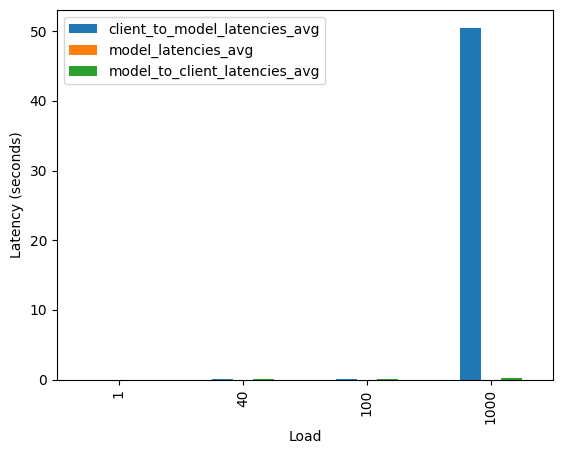

In [26]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_max,model_latencies_max,model_to_client_latencies_max
0,1,1,4,1,2.124602,1.003462,0.012141
1,1,1,4,40,13.087351,1.003513,0.111905
2,1,1,4,100,14.166387,1.005966,0.011638
3,1,1,4,1000,13.348014,1.003184,0.069556


Text(0, 0.5, 'Latency (seconds)')

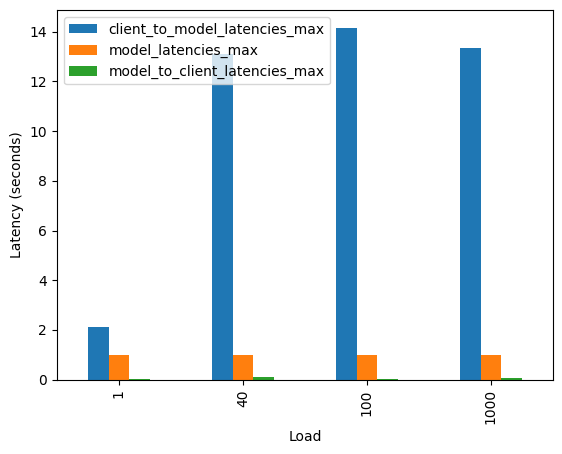

In [27]:
model_variant = 1
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_max', 'model_latencies_max', 'model_to_client_latencies_max']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_max', 'model_latencies_max', 'model_to_client_latencies_max'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

In [18]:
import time
results = loader1.read_results()
experiment_id = 4
responses = loader1.flatten_results(results[str(experiment_id)]['responses'])
sending_times = []
for response in responses:
    try:
        sending_time = time.ctime(response['timing']['sending_time'])
        model_arrival_time = time.ctime(
        json.loads(
            response['outputs'][0][
                'data'][0])['time']['arrival_mock_one'])
        arrival_time = time.ctime(response['timing']['arrival_time'])
    except KeyError:
        # print('timed out!')
        pass
    print(f"sending time: {sending_time}, model_arrival_time: {model_arrival_time}, arrival time: {arrival_time}")

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


NameError: name 'sending_time' is not defined